In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from nilearn import datasets

In [6]:
# Load the feature time series
time_series = pd.read_csv('features.csv', header=None, sep=" ")

# Fetch the Haxby dataset and load behavioral data
subj4 = datasets.fetch_haxby(subjects=[2])
behavioral = pd.read_csv(subj4['session_target'][0], sep=" ")

# Print basic info about data
print("Feature time series shape: ", time_series.shape)
print("Behavioral data head: ", behavioral.head())

[get_dataset_dir] Dataset found in /Users/prisha/nilearn_data/haxby2001

Feature time series shape:  (1452, 82)
Behavioral data head:    labels  chunks
0   rest       0
1   rest       0
2   rest       0
3   rest       0
4   rest       0


In [7]:
# Restrict to face, house conditions
conditions = behavioral["labels"]
condition_mask = conditions.isin(["face", "house"])  # Change to ["face", "scissors"] for face vs scissors
condition_mask_array = np.array(condition_mask)

# Filter time series and conditions using the mask
X = time_series[condition_mask_array]
y = conditions[condition_mask_array]

# Print the shapes of the filtered data
print("Filtered data shapes -> X: ", X.shape, " y: ", y.shape)

Filtered data shapes -> X:  (216, 82)  y:  (216,)


In [8]:
# Split the data into training and test sets (33% test size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Print the shapes of the train-test split
print(f"Train-Test split shapes -> X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

Train-Test split shapes -> X_train: (144, 82), X_test: (72, 82), y_train: (144,), y_test: (72,)


In [9]:
# Initialize the LinearSVC model
svc = LinearSVC()

# Train the model on the training data
svc.fit(X_train, y_train)

# Predict the labels for the test data
predicted = svc.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predicted)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6388888888888888


In [10]:
accuracy_values = []

# Perform Leave-One-Chunk-Out cross-validation
for val in range(12):
    # Define the train-test conditions for each chunk
    condition_mask_train = (condition_mask) & (behavioral["chunks"] != val)
    condition_mask_test = (condition_mask) & (behavioral["chunks"] == val)

    # Split the time series and labels based on the condition mask
    X_train_selected = X[condition_mask_train]
    X_test_selected = X[condition_mask_test]
    y_train_selected = y[condition_mask_train]
    y_test_selected = y[condition_mask_test]

    # Print the shapes of the train-test data for the current chunk
    print(f"\nTrain set shape (chunk {val}): {X_train_selected.shape}")
    print(f"Test set shape (chunk {val}): {X_test_selected.shape}")

    # Train and predict
    svc.fit(X_train_selected, y_train_selected)
    predicted_selected = svc.predict(X_test_selected)

    # Calculate accuracy and append it to the list
    accuracy = accuracy_score(y_test_selected, predicted_selected)
    accuracy_values.append(accuracy)

    # Print accuracy for the current chunk
    print(f"Accuracy for test chunk {val}: {accuracy}")

# Calculate the mean and standard deviation of the accuracies
mean_accuracy = np.mean(accuracy_values)
std_accuracy = np.std(accuracy_values)

print(f"\nMean Accuracy: {mean_accuracy}")
print(f"Standard Deviation: {std_accuracy}")


Train set shape (chunk 0): (198, 82)
Test set shape (chunk 0): (18, 82)
Accuracy for test chunk 0: 0.5

Train set shape (chunk 1): (198, 82)
Test set shape (chunk 1): (18, 82)
Accuracy for test chunk 1: 1.0

Train set shape (chunk 2): (198, 82)
Test set shape (chunk 2): (18, 82)
Accuracy for test chunk 2: 0.9444444444444444

Train set shape (chunk 3): (198, 82)
Test set shape (chunk 3): (18, 82)
Accuracy for test chunk 3: 0.4444444444444444

Train set shape (chunk 4): (198, 82)
Test set shape (chunk 4): (18, 82)
Accuracy for test chunk 4: 0.3333333333333333

Train set shape (chunk 5): (198, 82)
Test set shape (chunk 5): (18, 82)
Accuracy for test chunk 5: 0.5555555555555556

Train set shape (chunk 6): (198, 82)
Test set shape (chunk 6): (18, 82)
Accuracy for test chunk 6: 0.5

Train set shape (chunk 7): (198, 82)
Test set shape (chunk 7): (18, 82)
Accuracy for test chunk 7: 0.7222222222222222

Train set shape (chunk 8): (198, 82)
Test set shape (chunk 8): (18, 82)
Accuracy for test ch

/var/folders/4b/0_65g89n2yn9tmtywtpdt5900000gn/T/ipykernel_32118/4080722953.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_train_selected = X[condition_mask_train]
/var/folders/4b/0_65g89n2yn9tmtywtpdt5900000gn/T/ipykernel_32118/4080722953.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_selected = X[condition_mask_test]
/var/folders/4b/0_65g89n2yn9tmtywtpdt5900000gn/T/ipykernel_32118/4080722953.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_train_selected = X[condition_mask_train]
/var/folders/4b/0_65g89n2yn9tmtywtpdt5900000gn/T/ipykernel_32118/4080722953.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_selected = X[condition_mask_test]
/var/folders/4b/0_65g89n2yn9tmtywtpdt5900000gn/T/ipykernel_32118/4080722953.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_train_selected = X[condit

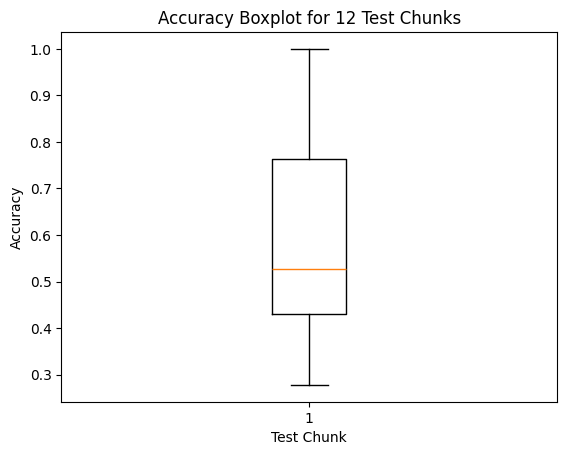

In [11]:
# Plot a boxplot of the accuracies for the 12 test chunks
plt.boxplot(accuracy_values)
plt.title('Accuracy Boxplot for 12 Test Chunks')
plt.xlabel('Test Chunk')
plt.ylabel('Accuracy')
plt.show()

/var/folders/4b/0_65g89n2yn9tmtywtpdt5900000gn/T/ipykernel_32118/3901550689.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_train_selected = X[condition_mask_train]
/var/folders/4b/0_65g89n2yn9tmtywtpdt5900000gn/T/ipykernel_32118/3901550689.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_selected = X[condition_mask_test]
/var/folders/4b/0_65g89n2yn9tmtywtpdt5900000gn/T/ipykernel_32118/3901550689.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_train_selected = X[condition_mask_train]
/var/folders/4b/0_65g89n2yn9tmtywtpdt5900000gn/T/ipykernel_32118/3901550689.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_selected = X[condition_mask_test]
/var/folders/4b/0_65g89n2yn9tmtywtpdt5900000gn/T/ipykernel_32118/3901550689.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_train_selected = X[condit

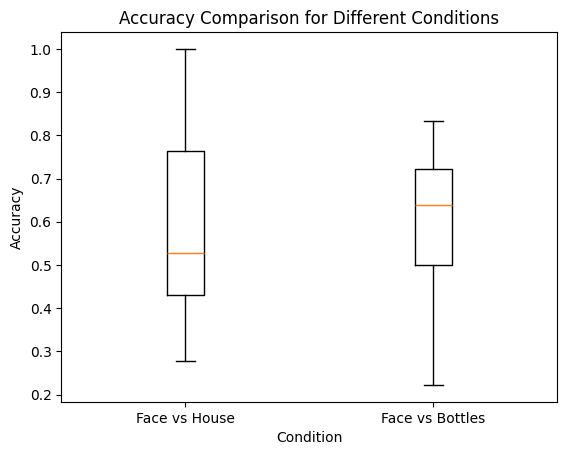

In [13]:
# Restrict to face, scissors conditions
condition_mask = conditions.isin(["face", "bottle"])  # Change conditions as needed
condition_mask_array = np.array(condition_mask)

# Filter time series and conditions using the mask
X = time_series[condition_mask_array]
y = conditions[condition_mask_array]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Perform Leave-One-Chunk-Out cross-validation
accuracy_values2 = []
for val in range(12):
    condition_mask_train = (condition_mask) & (behavioral["chunks"] != val)
    condition_mask_test = (condition_mask) & (behavioral["chunks"] == val)

    X_train_selected = X[condition_mask_train]
    X_test_selected = X[condition_mask_test]
    y_train_selected = y[condition_mask_train]
    y_test_selected = y[condition_mask_test]

    svc.fit(X_train_selected, y_train_selected)
    predicted_selected = svc.predict(X_test_selected)
    accuracy = accuracy_score(y_test_selected, predicted_selected)
    accuracy_values2.append(accuracy)

# Plot the comparison of accuracy between conditions
plt.boxplot([accuracy_values, accuracy_values2], labels=['Face vs House', 'Face vs Bottles'])
plt.title('Accuracy Comparison for Different Conditions')
plt.xlabel('Condition')
plt.ylabel('Accuracy')
plt.show()